In [1]:
import readline
readline.clear_history()

In [2]:
#Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder

# Read files

In [3]:
#read files, join - MUST HAVE FILES IN LOCAL DIRECTORY
df = pd.read_excel("/Users/rehanarajwani/Documents/Rahim/Bankruptcy_data_Final 2.xlsx")

In [4]:
#Number of NaN in the dataset
df.isnull().sum()
#Lot od NaN in Operational Margin,Assets Growth, Sales Growth and Employee Growth

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [5]:
#correlation matrix
df.profile_report()

In [6]:
#fill all blank | Nan's with 0
df = df.fillna(0)

In [7]:
#No NaN's in the dataset
df.isnull().sum()

Data_Year_-_Fiscal    0
Tobin's_Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage_Ratio        0
Asset_Turnover        0
Operational_Margin    0
Return_on_Equity      0
Market_Book_Ratio     0
Assets_Growth         0
Sales_Growth          0
Employee_Growth       0
BK                    0
dtype: int64

In [8]:
df.head()

,Data_Year_-_Fiscal,Tobin's_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.000000,0.000000,0.000000,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


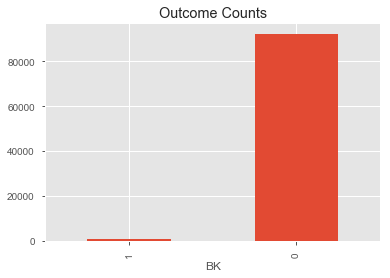

In [9]:
#check baseline for BK
df.groupby(df["BK"])['BK'].count().sort_values().plot(kind='bar')
plt.title("Outcome Counts")
plt.savefig("OutcomePurchase")
plt.show()

# it clearly show's that the data is unbalanced. Total observations 92873 and only 558 are 1's 

In [10]:
#correlation matrix
#df.profile_report()

In [11]:
# To find the correlation among 
# the columns using pearson method 
df.corr(method ='pearson') 

#Liquidity and Return_on_Equity has 58% corr. we will drop one feature if the model performance is not good. 

,Data_Year_-_Fiscal,Tobin's_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
Data_Year_-_Fiscal,1.000000,0.018552,0.001244,-0.014272,-0.030051,-0.021942,-0.001418,-0.070177,-0.020983,-0.002994,0.001469,0.008003,-0.000579,0.008116,-0.083014
Tobin's_Q,0.018552,1.000000,0.000177,-0.214069,-0.158080,-0.193209,-0.000180,0.002268,-0.000615,-0.078320,-0.024461,-0.000284,-0.000234,-0.000658,-0.001907
EPS,0.001244,0.000177,1.000000,-0.000129,-0.000281,-0.000211,0.000025,0.000962,-0.000211,0.248225,0.000107,0.000070,0.000067,0.000171,-0.007200
Liquidity,-0.014272,-0.214069,-0.000129,1.000000,0.470623,0.226977,0.000147,-0.035394,0.002599,0.582317,0.001389,0.000485,0.000248,0.000810,0.001189
Profitability,-0.030051,-0.158080,-0.000281,0.470623,1.000000,0.434537,0.000279,-0.039363,0.006070,0.106382,-0.003999,0.000836,0.000446,0.001314,0.002444
Productivity,-0.021942,-0.193209,-0.000211,0.226977,0.434537,1.000000,0.000225,-0.021562,0.014880,0.001009,0.005940,0.000491,0.000298,0.001038,0.001339
Leverage_Ratio,-0.001418,-0.000180,0.000025,0.000147,0.000279,0.000225,1.000000,-0.001195,0.000279,-0.000012,0.030030,-0.000089,0.000101,-0.000056,-0.000149
Asset_Turnover,-0.070177,0.002268,0.000962,-0.035394,-0.039363,-0.021562,-0.001195,1.000000,0.017205,-0.005027,-0.005127,-0.003900,0.000030,-0.002960,0.015289
Operational_Margin,-0.020983,-0.000615,-0.000211,0.002599,0.006070,0.014880,0.000279,0.017205,1.000000,0.001935,0.004989,-0.000780,0.000376,0.000112,0.001642
Return_on_Equity,-0.002994,-0.078320,0.248225,0.582317,0.106382,0.001009,-0.000012,-0.005027,0.001935,1.000000,0.000084,0.000105,0.000057,0.000147,-0.006503


# We are not doing any feature engineering now. We will first run the models and check the performance and then use smote function to balance the data and then run same models again and check the performance. 

In [12]:
#train test split dataset to measure performance.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:14],df['BK'],test_size=0.25,random_state=1)

# LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
LR_pred = logreg.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, LR_pred))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, LR_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, LR_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_test, LR_pred)))
print("Log Loss = {:.2f}".format(log_loss(y_test, LR_pred)))

[[22981    97]
 [  138     2]]
Accuracy = 0.99
Kappa = 0.01
F1 Score = 0.02
Log Loss = 0.35


138 instances are not predicted correctly

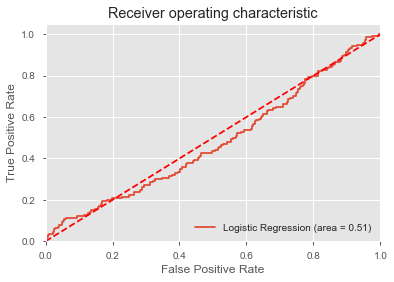

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

#predict and store predictions in a series 
rfc_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rfc_predict))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, rfc_predict)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, rfc_predict)))
print("F1 Score = {:.2f}".format(f1_score(y_test, rfc_predict)))
print("Log Loss = {:.2f}".format(log_loss(y_test, rfc_predict)))

[[23076     2]
 [  139     1]]
Accuracy = 0.99
Kappa = 0.01
F1 Score = 0.01
Log Loss = 0.21


# Accuracy is .99 However, this is not a good model as our model is not good on false negative. 

# Naive Bayes

In [17]:

from sklearn.naive_bayes import BernoulliNB

#Generate predictions using Naive Bayes
clf = BernoulliNB()
clf.fit(x_train,y_train)
y_preds_NB = clf.predict(x_test)

#predict and store predictions in a series 
NB_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NB)))

[[21282  1796]
 [   79    61]]
Accuracy = 0.92
Kappa = 0.05
F1 Score = 0.06
Log Loss = 2.79


#Naive Bayes is better than RF as it's predicting false negative better than RF.

# Neural Network

In [18]:
#import NN package

from sklearn.neural_network import MLPClassifier

#Generate prediction using Neural Net
clf = MLPClassifier()
clf.fit(x_train,y_train)
y_preds_NN = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NN))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NN)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NN)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NN)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NN)))

[[23073     5]
 [  139     1]]
Accuracy = 0.99
Kappa = 0.01
F1 Score = 0.01
Log Loss = 0.21


NN is not a good model either for this unbalanced dataset. 

# AdaBoost

In [19]:
#import AdaBoostClassifier package
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier(random_state=1)
AdaB.fit(x_train, y_train)
y_preds_AdaB = AdaB.predict(x_test) 


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_AdaB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_AdaB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_AdaB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_AdaB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_AdaB)))

[[23070     8]
 [  140     0]]
Accuracy = 0.99
Kappa = -0.00
F1 Score = 0.00
Log Loss = 0.22


Model is not good. 

# Gradient Boosting (GBM)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(learning_rate=0.01,random_state=1)

GBM.fit(x_train, y_train)
y_preds_GBM = GBM.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_GBM))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_GBM)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_GBM)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_GBM)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_GBM)))

[[23078     0]
 [  140     0]]
Accuracy = 0.99
Kappa = 0.00
F1 Score = 0.00
Log Loss = 0.21


Again, not good for this dataset. 

# Decision Tree

In [21]:
#import DecisionTreeClassifier package
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_depth=3)
dtc.fit(x_train, y_train)
y_preds_dtc = dtc.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_dtc))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_dtc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_dtc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_dtc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_dtc)))

[[23078     0]
 [  140     0]]
Accuracy = 0.99
Kappa = 0.00
F1 Score = 0.00
Log Loss = 0.21


At least it predicted 12 instances. 

In [23]:
for importance, name in sorted(zip(dtc.feature_importances_, x_train.columns),reverse=True)[:13]:
    print (name, importance)

Return_on_Equity 0.6788417715080558
Asset_Turnover 0.17131258684306835
Profitability 0.14984564164887576
Tobin's_Q 0.0
Sales_Growth 0.0
Productivity 0.0
Operational_Margin 0.0
Market_Book_Ratio 0.0
Liquidity 0.0
Leverage_Ratio 0.0
Employee_Growth 0.0
EPS 0.0
Assets_Growth 0.0


Top 10 features with Decision Tree

[Text(167.4, 190.26, 'X[8] <= -1.262\ngini = 0.012\nsamples = 69654\nvalue = [69236, 418]'),
 Text(83.7, 135.9, 'X[6] <= 0.87\ngini = 0.119\nsamples = 2727\nvalue = [2554, 173]'),
 Text(41.85, 81.53999999999999, 'X[8] <= -1.266\ngini = 0.065\nsamples = 1606\nvalue = [1552, 54]'),
 Text(20.925, 27.180000000000007, 'gini = 0.064\nsamples = 1605\nvalue = [1552, 53]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= -2.628\ngini = 0.19\nsamples = 1121\nvalue = [1002, 119]'),
 Text(104.625, 27.180000000000007, 'gini = 0.086\nsamples = 469\nvalue = [448, 21]'),
 Text(146.475, 27.180000000000007, 'gini = 0.255\nsamples = 652\nvalue = [554, 98]'),
 Text(251.10000000000002, 135.9, 'X[8] <= -0.203\ngini = 0.007\nsamples = 66927\nvalue = [66682, 245]'),
 Text(209.25, 81.53999999999999, 'X[8] <= -0.209\ngini = 0.031\nsamples = 8401\nvalue = [8268, 133]'),
 Text(188.32500000000002, 27.180000000000007, 'g

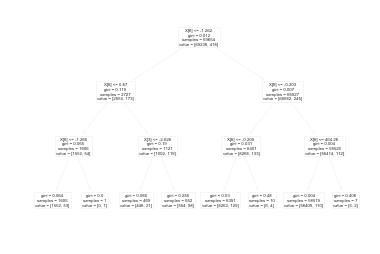

In [25]:
from sklearn import tree
tree.plot_tree(dtc)  

In [26]:
#split dataset in features and target variable
#feature_cols = df.columns[:1:14]

#X = df[feature_cols] # Features
#y = df.BK # Target variable

In [27]:
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#import pydotplus

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [28]:
#dot_data = StringIO()
#export_graphviz(dtc, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
#Image(graph.create_png())


# KNN

In [29]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

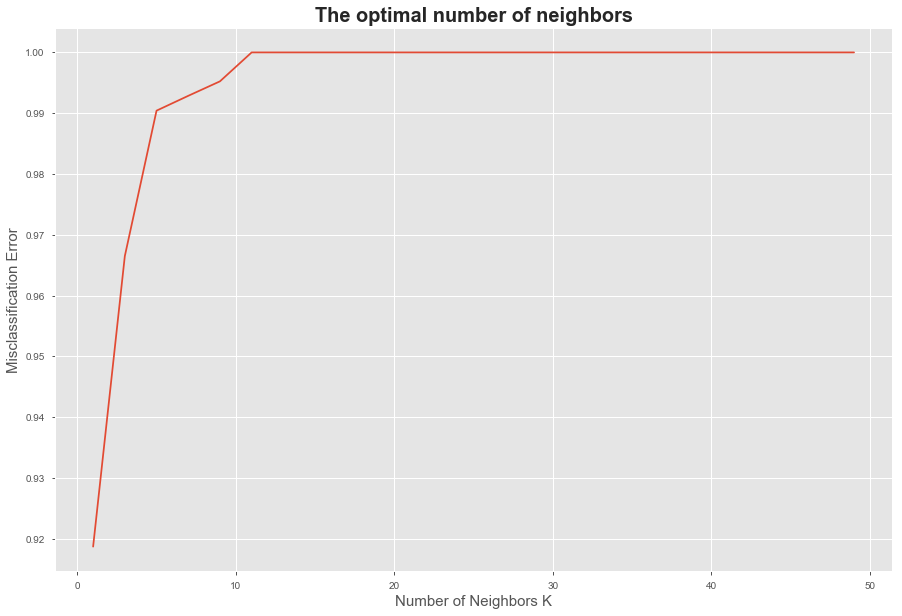

In [30]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [31]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [32]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_preds_knn = knn_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_knn))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_knn)))

[[23058    20]
 [  136     4]]
Accuracy = 0.99
Kappa = 0.05
F1 Score = 0.05
Log Loss = 0.23


Predicted 4 instances

# SVC - Linear

from sklearn.svm import SVC

#SVM
svm_clf = SVC(kernel="linear", C=0.25)
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svm))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))

# SMOTE

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
there is visual on this link. We should add in the report to explain up and down sample.

In [33]:
labels = df.columns[:1:14]

In [34]:
X = df[labels]
y = df['BK']

In [35]:
# Class count
count_class_0, count_class_1 = df.BK.value_counts()

In [36]:
# Divide by class
df_class_0 = df[df['BK'] == 0]
df_class_1 = df[df['BK'] == 1]

# Random under-sampling

Random under-sampling:
1    558
0    558
Name: BK, dtype: int64


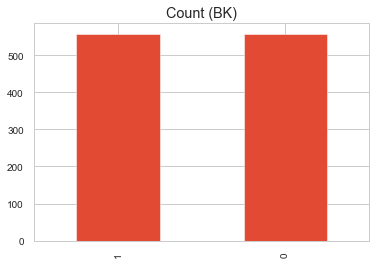

In [37]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.BK.value_counts())

df_test_under.BK.value_counts().plot(kind='bar', title='Count (BK)');

In [38]:
df_test_under.shape

(1116, 15)

In [39]:
df_test_under.head()

,Data_Year_-_Fiscal,Tobin's_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
82085,2012,0.75,0.42,0.79,0.18,0.02,0.00,0.47,0.04,0.06,35.17,0.047125,0.056491,-0.035447,0
47351,2002,0.75,-0.01,-0.25,-0.90,-0.09,0.49,0.01,-16.76,-0.05,3.98,0.000000,0.000000,0.000000,0
20610,1986,1.41,1.95,0.29,0.42,0.14,0.43,1.36,0.10,0.07,79.94,0.313821,0.185493,0.151752,0
14869,2016,3.79,6.07,-0.05,0.16,0.23,-74.24,1.25,0.18,0.05,-142228.38,-0.016170,-0.020924,-0.023256,0
86230,2012,1.98,-0.12,0.42,0.10,-0.20,0.06,0.89,-0.23,-0.08,55.24,0.058072,-0.201491,-0.080460,0


# Split the data

In [40]:
#train test split dataset to measure performance.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_test_under.iloc[:,1:14],df_test_under['BK'],test_size=0.25,random_state=1)

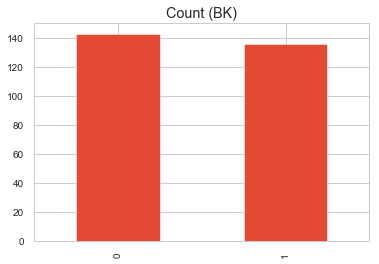

In [41]:
y_test.value_counts().plot(kind='bar', title='Count (BK)');

0 = 143

1 = 136

Total = 279

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
LR_pred = logreg.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, LR_pred))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, LR_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, LR_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_test, LR_pred)))
print("Log Loss = {:.2f}".format(log_loss(y_test, LR_pred)))


[[115  28]
 [ 50  86]]
Accuracy = 0.72
Kappa = 0.44
F1 Score = 0.69
Log Loss = 9.66


50 instances are not predicted correctly

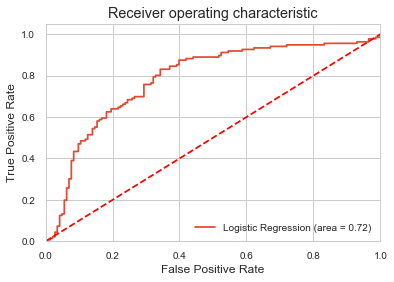

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

#predict and store predictions in a series 
rfc_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rfc_predict))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, rfc_predict)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, rfc_predict)))
print("F1 Score = {:.2f}".format(f1_score(y_test, rfc_predict)))
print("Log Loss = {:.2f}".format(log_loss(y_test, rfc_predict)))

[[122  21]
 [ 36 100]]
Accuracy = 0.80
Kappa = 0.59
F1 Score = 0.78
Log Loss = 7.06


This model is good as it can predict better compared to our original model. 
Out of 141 BK instances it predicted 101 correctly and 35 are wrong.
Let's run it with other models.

# Naive Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB

#Generate predictions using Naive Bayes
clf = BernoulliNB()
clf.fit(x_train,y_train)
y_preds_NB = clf.predict(x_test)

#predict and store predictions in a series 
NB_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NB)))

[[ 92  51]
 [ 36 100]]
Accuracy = 0.69
Kappa = 0.38
F1 Score = 0.70
Log Loss = 10.77


Same results as RF

# Neural Network

In [46]:
#import NN package

from sklearn.neural_network import MLPClassifier

#Generate prediction using Neural Net
clf = MLPClassifier()
clf.fit(x_train,y_train)
y_preds_NN = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NN))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NN)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NN)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NN)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NN)))

[[119  24]
 [ 41  95]]
Accuracy = 0.77
Kappa = 0.53
F1 Score = 0.75
Log Loss = 8.05


Model was not able to predict 40 instances

# AdaBoost

In [47]:
#import AdaBoostClassifier package
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier(random_state=1)
AdaB.fit(x_train, y_train)
y_preds_AdaB = AdaB.predict(x_test) 


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_AdaB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_AdaB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_AdaB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_AdaB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_AdaB)))

[[117  26]
 [ 29 107]]
Accuracy = 0.80
Kappa = 0.61
F1 Score = 0.80
Log Loss = 6.81


Only 27 instances are not predicted correctly.

# Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(learning_rate=0.01,random_state=1)

GBM.fit(x_train, y_train)
y_preds_GBM = GBM.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_GBM))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_GBM)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_GBM)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_GBM)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_GBM)))

[[117  26]
 [ 40  96]]
Accuracy = 0.76
Kappa = 0.53
F1 Score = 0.74
Log Loss = 8.17


38 instances are not predicted correctly.

# Decision Tree

In [49]:
#import DecisionTreeClassifier package
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_preds_dtc = dtc.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_dtc))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_dtc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_dtc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_dtc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_dtc)))

[[107  36]
 [ 35 101]]
Accuracy = 0.75
Kappa = 0.49
F1 Score = 0.74
Log Loss = 8.79


33 instances are not predicted correctly.

In [50]:
for importance, name in sorted(zip(dtc.feature_importances_, x_train.columns),reverse=True)[:13]:
    print (name, importance)

Return_on_Equity 0.45900869277012
EPS 0.09579044139089746
Asset_Turnover 0.06644343541635159
Liquidity 0.06598262492374847
Tobin's_Q 0.0516094116957405
Employee_Growth 0.05134838024424239
Market_Book_Ratio 0.04548622403187963
Profitability 0.03353123051364789
Leverage_Ratio 0.031906624886820605
Operational_Margin 0.027606830765591398
Assets_Growth 0.026375304812440298
Productivity 0.024504291251750566
Sales_Growth 0.020406507296769235


# KNN

In [53]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

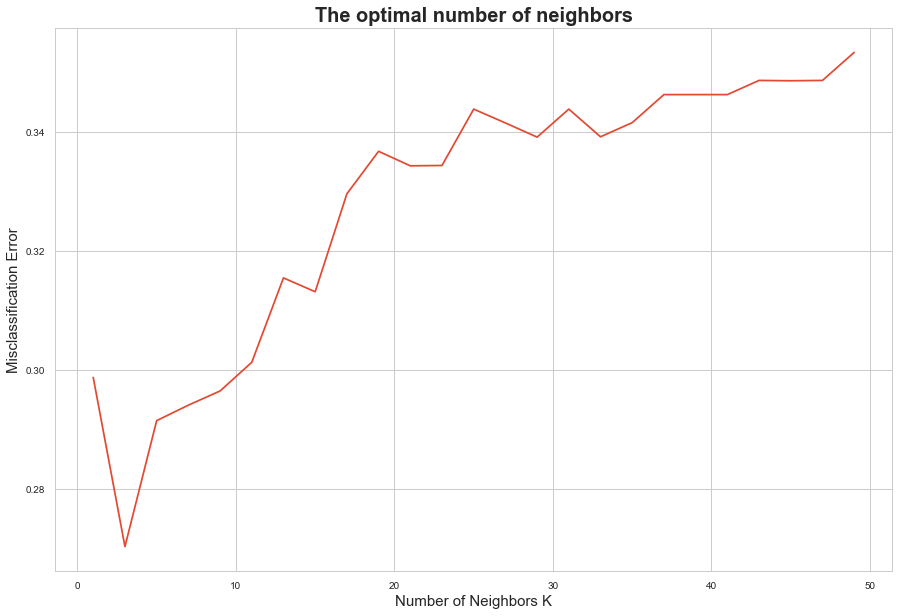

In [54]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [55]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [56]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_preds_knn = knn_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_knn))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_knn)))

[[103  40]
 [ 40  96]]
Accuracy = 0.71
Kappa = 0.43
F1 Score = 0.71
Log Loss = 9.90


40 instances are not predicted correctly.

# SVC - Linear

from sklearn.svm import SVC

#SVM
svm_clf = SVC(kernel="linear", C=0.25)
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svm))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))

35 instances are not predicted correctly.

# Now Let's Try Random Over Sampling

Random over-sampling:
1    92314
0    92314
Name: BK, dtype: int64


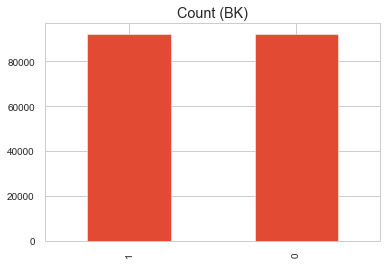

In [57]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.BK.value_counts())

df_test_over.BK.value_counts().plot(kind='bar', title='Count (BK)');

In [58]:
df_test_over.shape

(184628, 15)

In [59]:
df_test_over.head()

,Data_Year_-_Fiscal,Tobin's_Q,EPS,Liquidity,Profitability,Productivity,Leverage_Ratio,Asset_Turnover,Operational_Margin,Return_on_Equity,Market_Book_Ratio,Assets_Growth,Sales_Growth,Employee_Growth,BK
0,1979,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.000000,0.000000,0.000000,0
1,1980,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,1981,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,1982,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,1983,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


# Split the data

In [60]:
#train test split dataset to measure performance.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_test_over.iloc[:,1:14],df_test_over['BK'],test_size=0.25,random_state=1)

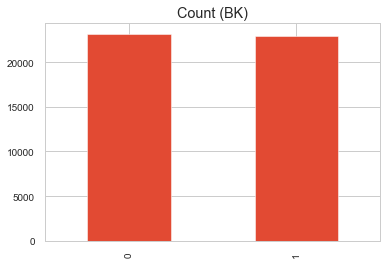

In [61]:
y_test.value_counts().plot(kind='bar', title='Count (BK)');

0 = 23,200

1 = 22,957

Total = 46,157

# Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
LR_pred = logreg.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, LR_pred))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, LR_pred)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, LR_pred)))
print("F1 Score = {:.2f}".format(f1_score(y_test, LR_pred)))
print("Log Loss = {:.2f}".format(log_loss(y_test, LR_pred)))

[[19048  4152]
 [ 8884 14073]]
Accuracy = 0.72
Kappa = 0.43
F1 Score = 0.68
Log Loss = 9.75


8884 instances are not predicted correctly

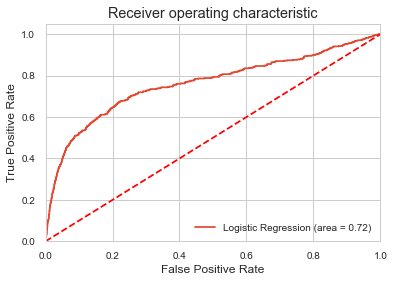

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(x_train,y_train)

#predict and store predictions in a series 
rfc_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rfc_predict))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, rfc_predict)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, rfc_predict)))
print("F1 Score = {:.2f}".format(f1_score(y_test, rfc_predict)))
print("Log Loss = {:.2f}".format(log_loss(y_test, rfc_predict)))

[[23177    23]
 [    0 22957]]
Accuracy = 1.00
Kappa = 1.00
F1 Score = 1.00
Log Loss = 0.02


# Our model is predicting all false negative and TP. Accuracy is 100%

# Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB

#Generate predictions using Naive Bayes
clf = BernoulliNB()
clf.fit(x_train,y_train)
y_preds_NB = clf.predict(x_test)

#predict and store predictions in a series 
NB_predict = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NB)))

[[15473  7727]
 [ 4130 18827]]
Accuracy = 0.74
Kappa = 0.49
F1 Score = 0.76
Log Loss = 8.87


Not a good model as we are not predicting 4036 instances

# Neural Network

In [66]:
#import NN package

from sklearn.neural_network import MLPClassifier

#Generate prediction using Neural Net
clf = MLPClassifier()
clf.fit(x_train,y_train)
y_preds_NN = clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_NN))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_NN)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_NN)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_NN)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_NN)))

[[19739  3461]
 [ 1929 21028]]
Accuracy = 0.88
Kappa = 0.77
F1 Score = 0.89
Log Loss = 4.03


1929 instances are not predicted correctly.

# AdaBoost

In [67]:
#import AdaBoostClassifier package
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier(random_state=1)
AdaB.fit(x_train, y_train)
y_preds_AdaB = AdaB.predict(x_test) 


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_AdaB))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_AdaB)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_AdaB)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_AdaB)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_AdaB)))

[[19982  3218]
 [ 3068 19889]]
Accuracy = 0.86
Kappa = 0.73
F1 Score = 0.86
Log Loss = 4.70


3068 instances are not predicted correctly.

# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
GBM = GradientBoostingClassifier(learning_rate=0.01,random_state=1)

GBM.fit(x_train, y_train)
y_preds_GBM = GBM.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_GBM))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_GBM)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_GBM)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_GBM)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_GBM)))

[[19563  3637]
 [ 3558 19399]]
Accuracy = 0.84
Kappa = 0.69
F1 Score = 0.84
Log Loss = 5.38


3558 instances are not predicted correctly.

# Decision Tree

In [69]:
#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_preds_dtc = dtc.predict(x_test) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_dtc))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_dtc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_dtc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_dtc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_dtc)))

[[23042   158]
 [    0 22957]]
Accuracy = 1.00
Kappa = 0.99
F1 Score = 1.00
Log Loss = 0.12


Decision Tree is giving us 100% recall and accuracy

In [71]:
for importance, name in sorted(zip(dtc.feature_importances_, x_train.columns),reverse=True)[:13]:
    print (name, importance)

Return_on_Equity 0.3754836930180188
Market_Book_Ratio 0.08741218193642211
Sales_Growth 0.07877112723297403
EPS 0.07035518917975819
Leverage_Ratio 0.06762368446784989
Liquidity 0.06357018440946009
Asset_Turnover 0.05424955949879567
Tobin's_Q 0.04564254351430253
Assets_Growth 0.04536671054937694
Profitability 0.036920576461603606
Productivity 0.03611137216120019
Operational_Margin 0.02001790702437102
Employee_Growth 0.018475270545866937


# KNN

In [72]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

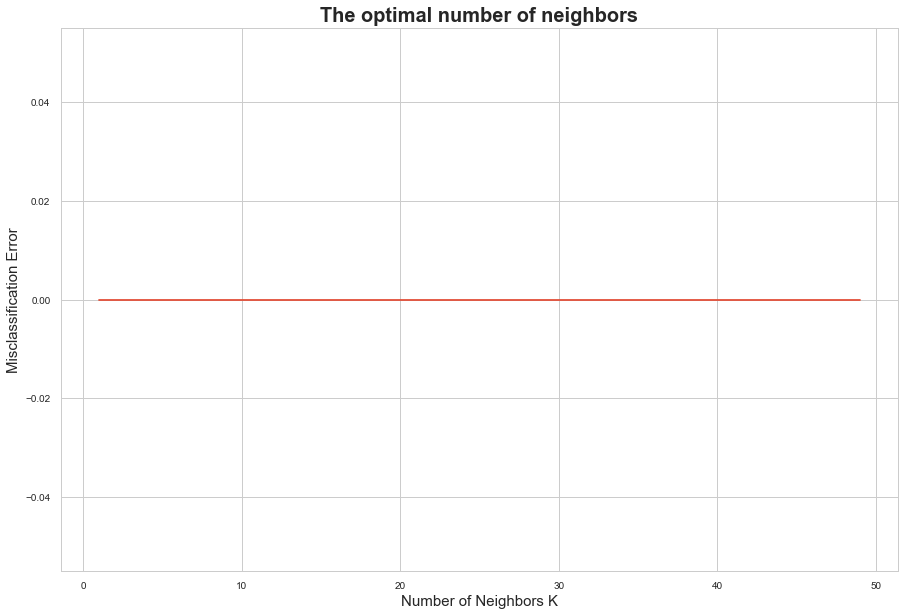

In [73]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [74]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


In [75]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
y_preds_knn = knn_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds_knn))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_preds_knn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_preds_knn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_preds_knn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_preds_knn)))

[[22917   283]
 [    0 22957]]
Accuracy = 0.99
Kappa = 0.99
F1 Score = 0.99
Log Loss = 0.21


KNN is also giving us 100% recall and accuracy

# SVC - Linear

from sklearn.svm import SVC

#SVM
svm_clf = SVC(kernel="linear", C=0.25)
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_svm))

from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))

It takes a lot of time so we will run it later

In [ ]:
# Further work to be done 
# Best Features - Feature importance for the best models. 
# Add SVM model as Prof mentioned it.
# Add Logistics regression
# Table at the end to summarizing our model perfomance with and without up | down sample
# Add more as per team's request